In [77]:
# 1️  Import des bibliothèques
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import warnings
warnings.filterwarnings("ignore")

In [78]:
df = pd.read_csv("6_1_avocado.csv")

In [104]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [105]:
df.describe()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,2016-08-13 23:30:43.498273792,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
min,0.000000,2015-01-04 00:00:00,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,2015-10-25 00:00:00,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,2016-08-14 00:00:00,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,2017-06-04 00:00:00,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,2018-03-25 00:00:00,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000
std,15.481045,NaN,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938


In [79]:
print(df.columns.tolist())


['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region']


In [80]:
df["Date"] = pd.to_datetime(df["Date"])

# On prend une série unique : TotalUS + conventional
sub = df[(df["region"] == "TotalUS") & (df["type"] == "conventional")].copy()

# On garde seulement Date + AveragePrice
ts = sub.sort_values("Date").set_index("Date")["AveragePrice"]

# Fréquence hebdo (le dataset est hebdomadaire). On force une fréquence régulière.
ts = ts.asfreq("W-SUN")  # souvent les dates tombent sur dimanche
ts = ts.interpolate()    # au cas où il y a des trous

ts.name = "AveragePrice"
print(ts.head(), "\n---\n", ts.tail())

Date
2015-01-04    0.95
2015-01-11    1.01
2015-01-18    1.03
2015-01-25    1.04
2015-02-01    0.89
Freq: W-SUN, Name: AveragePrice, dtype: float64 
---
 Date
2018-02-25    1.06
2018-03-04    1.07
2018-03-11    1.09
2018-03-18    1.05
2018-03-25    1.03
Freq: W-SUN, Name: AveragePrice, dtype: float64


In [81]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


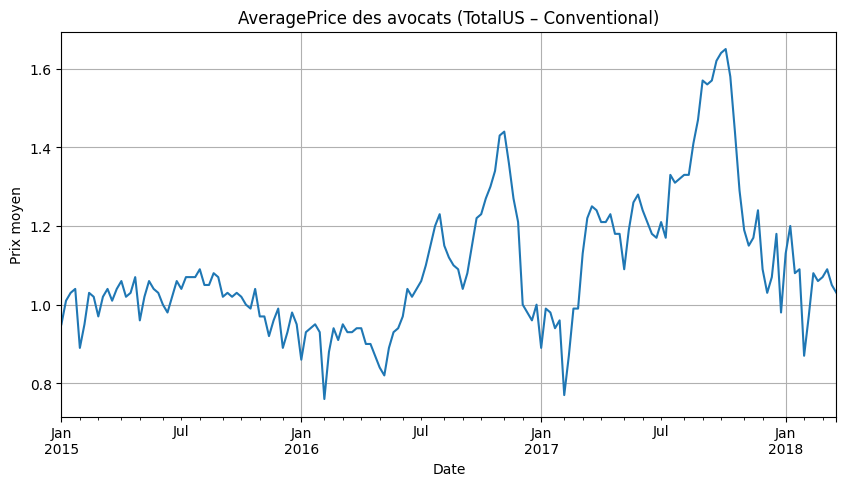

In [82]:
plt.figure(figsize=(10, 5))
ts.plot()
plt.title("AveragePrice des avocats (TotalUS – Conventional)")
plt.xlabel("Date")
plt.ylabel("Prix moyen")
plt.grid(True)
plt.show()

In [83]:
ts.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 169 entries, 2015-01-04 to 2018-03-25
Freq: W-SUN
Series name: AveragePrice
Non-Null Count  Dtype  
--------------  -----  
169 non-null    float64
dtypes: float64(1)
memory usage: 2.6 KB


In [84]:
ts.describe()

count    169.000000
mean       1.092012
std        0.174119
min        0.760000
25%        0.970000
50%        1.040000
75%        1.190000
max        1.650000
Name: AveragePrice, dtype: float64

In [85]:
def adf_test(series, name=""):
    s = series.dropna()
    stat, pval, lags, nobs, *_ = adfuller(s, autolag="AIC")
    print(f"--- ADF ({name}) ---")
    print("ADF stat =", stat)
    print("p-value  =", pval)
    print("lags     =", lags)
    print("nobs     =", nobs)

adf_test(ts, "Original")


--- ADF (Original) ---
ADF stat = -2.573341359997121
p-value  = 0.09863318474462979
lags     = 0
nobs     = 168


In [86]:
ts_log = np.log(ts)   # optionnel (tu peux aussi garder ts directement)
adf_test(ts_log, "Log")

ts_log_diff = ts_log.diff()
adf_test(ts_log_diff, "Diff(Log)")


--- ADF (Log) ---
ADF stat = -2.8628584245363085
p-value  = 0.04984067220924174
lags     = 0
nobs     = 168
--- ADF (Diff(Log)) ---
ADF stat = -4.574868464344687
p-value  = 0.00014367087857841853
lags     = 9
nobs     = 158


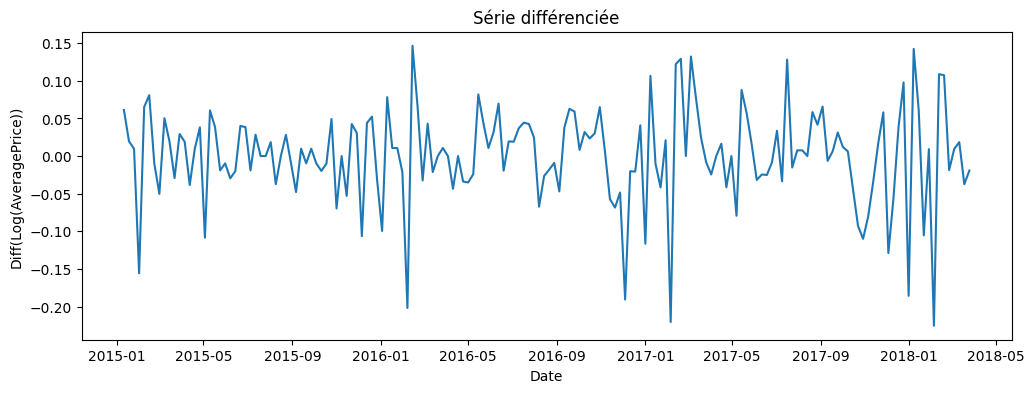

In [87]:
plt.figure(figsize=(12,4))
plt.plot(ts_log_diff.index, ts_log_diff.values)
plt.title("Série différenciée")
plt.xlabel("Date")
plt.ylabel("Diff(Log(AveragePrice))")
plt.show()

<Figure size 640x480 with 0 Axes>

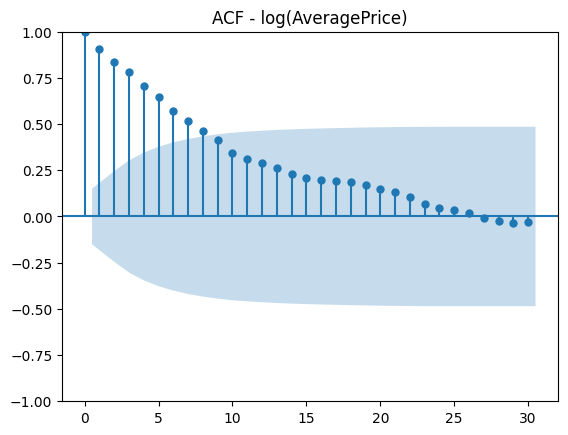

<Figure size 640x480 with 0 Axes>

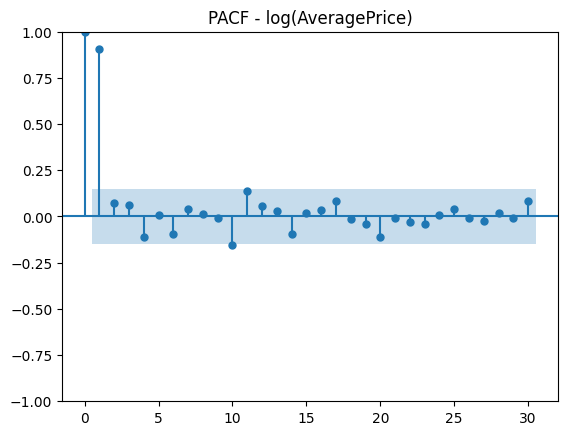

In [88]:
y = ts_log.dropna()  # on modélise log(ts) avec ARIMA(p,d,q)

plt.figure()
plot_acf(y, lags=30)
plt.title("ACF - log(AveragePrice)")
plt.show()

plt.figure()
plot_pacf(y, lags=30, method="ywm")
plt.title("PACF - log(AveragePrice)")
plt.show()


In [89]:
num_split=int(df.shape[0]*0.8)
train_set=df.iloc[:num_split]
test_set=df.iloc[num_split:]

In [90]:
model = ARIMA(train_set["AveragePrice"], order=(1,1,1))
model_fit = model.fit()

In [91]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:           AveragePrice   No. Observations:                14599
Model:                 ARIMA(1, 1, 1)   Log Likelihood                6559.477
Date:                Tue, 13 Jan 2026   AIC                         -13112.954
Time:                        14:00:17   BIC                         -13090.188
Sample:                             0   HQIC                        -13105.390
                              - 14599                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2491      0.013     19.482      0.000       0.224       0.274
ma.L1         -0.6212      0.011    -57.627      0.000      -0.642      -0.600
sigma2         0.0238      0.000    156.881      0.0

In [92]:
predictions = model_fit.predict(start=test_set.index[0], end=test_set.index[-1], typ='levels')

In [93]:
# h = 12  # 12 semaines en test
# train = y.iloc[:-h]
# test  = y.iloc[-h:]

# print("Train:", train.index.min().date(), "->", train.index.max().date())
# print("Test :", test.index.min().date(), "->", test.index.max().date())


In [94]:
# def grid_search_arima(train, d=1, p_max=3, q_max=3):
#     best_aic = np.inf
#     best_order = None
#     best_model = None

#     for p in range(p_max + 1):
#         for q in range(q_max + 1):
#             if p == 0 and q == 0:
#                 continue
#             try:
#                 m = ARIMA(train, order=(p, d, q), trend="n").fit()
#                 if m.aic < best_aic:
#                     best_aic = m.aic
#                     best_order = (p, d, q)
#                     best_model = m
#             except:
#                 pass

#     return best_order, best_aic, best_model

# best_order, best_aic, best_model = grid_search_arima(train, d=1, p_max=3, q_max=3)
# print("Meilleur ARIMA:", best_order, "| AIC =", best_aic)
# print(best_model.summary())


In [95]:
pred_log = best_model.forecast(steps=len(test))
pred_log = pd.Series(pred_log.values, index=test.index)

# retour à l’échelle originale
pred = np.exp(pred_log)
real = np.exp(test)

rmse = np.sqrt(mean_squared_error(real, pred))
mape = mean_absolute_percentage_error(real, pred)

print("RMSE:", rmse)
print("MAPE:", mape)



RMSE: 0.1058161463084751
MAPE: 0.08907189274644918


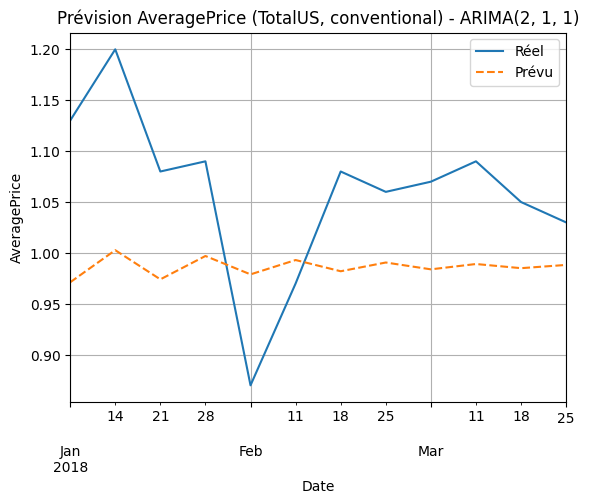

In [96]:
plt.figure()
real.plot(label="Réel")
pred.plot(label="Prévu", linestyle="--")
plt.title(f"Prévision AveragePrice (TotalUS, conventional) - ARIMA{best_order}")
plt.xlabel("Date")
plt.ylabel("AveragePrice")
plt.grid(True)
plt.legend()
plt.show()

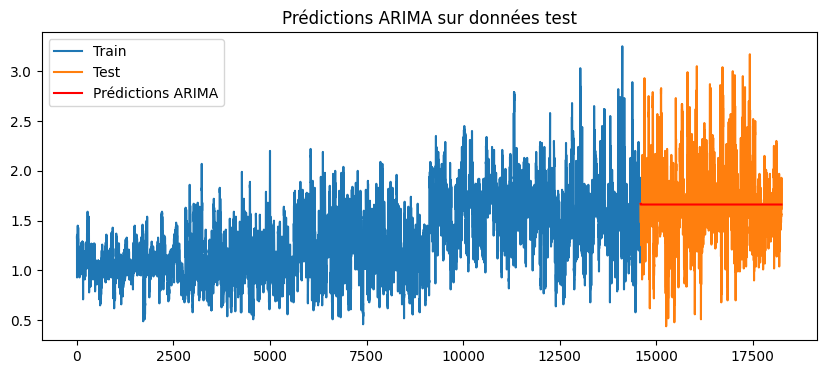

In [97]:
plt.figure(figsize=(10,4))
plt.plot(train_set['AveragePrice'], label='Train')
plt.plot(test_set['AveragePrice'], label='Test')
plt.plot(predictions, color='red', label='Prédictions ARIMA')
plt.title("Prédictions ARIMA sur données test")
plt.legend()
plt.show()

AUTO ARIMA

In [98]:
#!pip install pmdarima

In [99]:
from pmdarima import auto_arima

model_auto = auto_arima(
    train_set['AveragePrice'],
    start_p=0, max_p=5,
    start_q=0, max_q=5,
    d=None,             # auto_arima détecte automatiquement 'd'
    seasonal=False,     # Si ta série a saisonnalité, mettre True et ajouter m=12
    stepwise=True,      # Recherche efficace
    suppress_warnings=True,
    trace=True          # Affiche le processus de sélection
)


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-11105.212, Time=0.91 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-12363.780, Time=0.32 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-12955.676, Time=0.78 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-11107.212, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-13110.955, Time=2.85 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-13113.732, Time=4.41 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-12905.312, Time=0.51 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-13109.918, Time=1.45 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-13107.343, Time=2.72 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-13113.612, Time=4.45 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-13109.252, Time=0.79 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=8.33 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-13115.730, Time=0.81 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-13112.954, Time=0.80 sec
 ARIMA(2,1,0

In [100]:
print(model_auto.order)

(2, 1, 1)


In [101]:
predictions_auto = model_auto.predict(n_periods=len(test_set))
predictions_auto = pd.Series(predictions_auto, index=test_set.index)

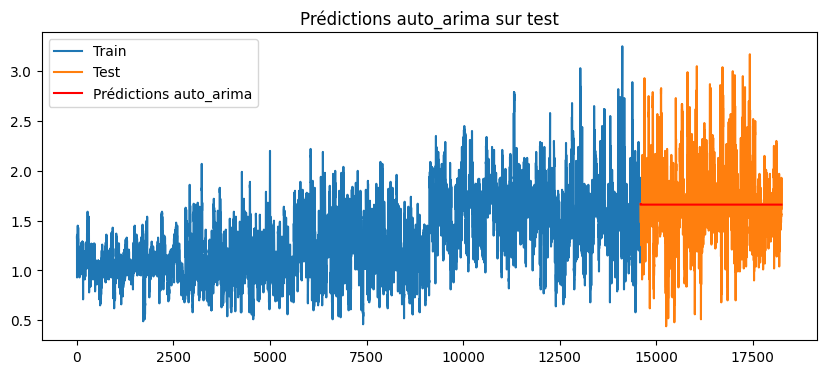

In [102]:
plt.figure(figsize=(10,4))
plt.plot(train_set['AveragePrice'], label='Train')
plt.plot(test_set['AveragePrice'], label='Test')
plt.plot(predictions_auto, color='red', label='Prédictions auto_arima')
plt.title("Prédictions auto_arima sur test")
plt.legend()
plt.show()

In [103]:
# compute RMSE comparing numeric series (not entire DataFrame)
y_true = test_set['AveragePrice'].astype(float)
y_pred  = predictions_auto.reindex(y_true.index).astype(float)  # ensure same index & numeric

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(rmse)

0.4069544611750624
